# Analisa Kinerja *Random Forest Classifier* dan *AdaBoost Classifier* Dalam Memprediksi Pasien Berisiko Serangan Jantung

Pihak medis atau pihak dalam industri kesehatan memiliki peranan dalam mengedukasi masyarakat untuk rutin mengecek kondisi mereka dan rutin dalam menjaga diri mereka agar tidak mengalami serangan jantung. Namun, dengan jumlah masyarakat yang cukup banyak sering kali menyulitkan pihak medis untuk memberikan perhatian dan edukasi pada setiap individu. Oleh karena itu, dibutuhkan algoritma prediksi serangan jantung, yang diharapkan dapat memberikan dukungan tambahan bagi pihak medis dalam mengidentifikasi potensi risiko serangan jantung pada setiap individu secara lebih efisien.

Dalam tahap awal proyek ini, fokus penelitian adalah mencari algoritma klasifikasi yang tepat dalam menentukan risiko individu berisiko terkena serangan jantung atau tidak, algoritma ini nantinya akan mengintegrasikan berbagai data klinis dan faktor risiko yang relevan untuk memprediksi risiko serangan jantung pada individu. Diharapkan dengan algoritma ini akan menjadi alat yang berguna bagi pihak medis dalam meningkatkan deteksi dini dalam pencegahan serangan jantung, serta meningkatkan kesadaran masyarakat tentang pentingnya menjaga kesehatan jantung.

## *Import Library* Yang Dibutuhkan

Tahap ini merupakan tahap memasukkan *Library* yang digunakan dalam pengerjaan proyek, adapun library yang digunakan adalah :
1. **Numpy** - Library untuk operasi matematika pada array dan matriks multidimensi
2. **Pandas** - Menyediakan struktur data dan alat analisis data yang mudah digunakan, terutama untuk bekerja dengan dataframe
3. **Matplotlib** - Library untuk visualisasi data dalam bentuk grafik, plot, histogram, dll
4. **Seaborn** - Memperindah plot matplotlib dengan antarmuka 
5. **Label Encoder** - Untuk mengubah label kategorikal menjadi bentuk yang dapat diolah oleh algoritma
6. **StandardScaler** - Metode untuk menskalakan fitur sehingga memiliki rata-rata nol dan varians satu, membantu algoritma Machine Learning menangani data dengan efisien.
7. **TrainTestSplit** - Memisahkan data menjadi data latih dan data uji
8. **RandomForestClassifier** - Algoritma ensemble untuk klasifikasi yang menggunakan kombinasi dari pohon keputusan.
9. **AdaBoostClassifier** - Algoritma klasifikasi ensemble yang menggabungkan beberapa model klasifikasi lemah menjadi satu model klasifikasi yang kuat, dengan fokus pada perbaikan kesalahan klasifikasi iteratif.
10. **accuracy_score** - Metrik untuk mengukur akurasi klasifikasi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## *Load* Data Kedalam Proyek Klasifikasi

Tahap berikutnya adalah memasukkan dataset yang digunakan dalam proyek ini
Dalam membangun model prediksi, proyek ini akan menggunakan data Heart Attack Risk Prediction Dataset yang dibuat oleh Sourav Banerjee.
dataset ini didapatkan dari platform Kaggle dan dapat diakses di [Link Berikut Ini](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset)

Kode dibawah ini digunakan untuk memasukkan dan *load* data terkait dalam *dataframe* menggunakan *library* **Pandas**. dan melihat preview data yang telah dimasukkan

In [2]:
dataset = pd.read_csv('heart_attack_prediction_dataset.csv')
dataset

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


Melihat *Preview* data diatas, tentunya tidak keseluruhan variabel akan digunakan untuk memprediksi risiko serangan jantung pada individu, hal ini akan ditentukan dalam tahapan selanjutnya yaitu Analisis Data.

## Tahapan Analisis Data

Tahapan pertama yang dilakukan adalah Identifikasi Dataset yang dipakai, beserta tipe data masing masing kolom, hal ini dapat dilakukan menggunakan kode dibawah ini

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Sesuai dengan informasi dataset yang didapatkan dalam sumber data, Dataset terkait memiliki 26 fitur, yang mana 25 fitur akan diseleksi dalam proses analisis data selanjutnya untuk digunakan dalam algoritma prediksi, dan 1 fitur target yaitu **Heart Attack Risk**

Berikut adalah daftar variabel yang terdapat dalam dataset
1. **Patient ID** - Identifikasi unik untuk setiap pasien.
2. **Age** - Usia Pasien (Numerikal).
3. **Sex** - Kategori Jenis Kelamin Pasien (Kategorikal : Laki-Laki/Perempuan).
4. **Cholesterol** - Tingkat Kolesterol Pasien (Numerikal).
5. **Blood Pressure** - Tingkat tekanan darah pasien (Numerikal).
6. **Heart Rate** - Denyut jantung pasien.
7. **Diabetes** - Apakah pasien memiliki diabetes (Kategorikal : Ya/Tidak).
8. **Family History** - Riwayat Keluarga terkait masalah jantung (Kategorikal : 1 - Ya, 0 - Tidak)
9. **Smoking** - Status Perokok Pasien (Kategorikal : 1 - Ya, 0 - Tidak)
10. **Obesity** - Status Obesitas Pasien (Kategorikal : 1 - Obesitas, 0 - Tidak Obesitas)
11. **Alcohol Consumption** - Tingkat konsumsi alkohol oleh pasien (Kategorikal : None/Light/Moderate/Heavy)
12. **Exercise Hours Per Week** - Jumlah Jam Olahraga Per Minggu (Numerikal)
13. **Diet** - Kebiasaan diet pasien (Kategorikal : Healthy/Average/Unhealthy)
14. **Previous Heart Problems** - Riwayat penyakit jantung pasien sebelumnya (Kategorikal : 1 - Ya, 0 - Tidak)
15. **Medication Use** - Penggunaan obat oleh pasien (Kategorikal : 1 - Ya, 0 - Tidak)
16. **Stress Level** - Tingkat Level Stress Pasien (1-10)
17. **Sedentary Hours Per Day** - Jam aktivitas duduk per hari (Kategorikal)
18. **Income** - Tingkat pendapatan pasien (Numerikal)
19. **BMI** - Index massa tubuh pasien (Numerikal)
20. **Triglycerides** - Tingkat trgliserida Pasien
21. **Physical Activity Days Per Week** - Hari-hari aktivitas fisik per minggu.
22. **Sleep Hours Per Day** - Jam tidur per hari
23. **Country** - Negara Tempat Tinggal Pasien
24. **Continent** - Benua tempat Tinggal Pasien
25. **Hemisphere** - Belahan bumi tempat tinggal pasien
26. **Heart Attack Risk** - Variabel Target Prediksi risiko serangan jantung (Kategori 1 : Memiliki Risiko, 0 - Tidak)

Langkah Selanjutnya adalah, Data harus dianalisa apakah dia memiliki **Missing Values** atau tidak, hal ini dapat dilakukan menggunakan fungsi isna() yang tersedia dalam **Pandas**

In [4]:
dataset.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Hasil analisa diatas dapat diketahui bahwa dataset yang digunakan tidak memiliki **Missing Values**.

Selanjutnya adalah, kita harus mengecek apakah terdapat duplikasi terhadap data, jumlah duplikasi dapat dicari menggunakan fungsi **duplicated()** yang terdapat dalam pandas, dan kita menggunakan bantuan fungsi **Sum()** untuk menghitung jumlah data duplikat tersebut.

In [5]:
print("Jumlah Duplikasi : ", dataset.duplicated().sum())

Jumlah Duplikasi :  0


Hasil kode diatas menunjukkan bahwa tidak ada duplikasi data dalam data terkait.

Langkah selanjutnya adalah mengidentifikasi adanya **Outlier** atau **Pencilan** Dalam Data.
**Outliers** adalah sampel yang nilainya sangat jauh dari cakupan umum data utama, ia adalah hasil pengamatan yang
kemunculannya sangat jarang dan berbeda dari hasil pengamatan lainnya.

Dalam proyek ini, kita akan menggunakan Metode **IQR Method** dalam mengatasi outlier.
Metode *Inter Quartile Range* atau IQR berhubungan dengan konsep kuartil. Kuartil dari suatu populasi adalah
tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada pada kuartil pertama (Q1),
setengah dari data berada dibawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3).

Nilai Interquartile Range didapatkan dengan rumus

IQR = Q3 - Q1

Kita akan menggunakan Bantuan Visualisasi Data Menggunakan **Boxplot** untuk mendeteksi outlier. dalam **Boxplot**, 
menunjukkan ukuran lokasi dan penyebaran, serta memberikan informasi tentang simetri dan outliers.

Sekarang...mari visualisasikan dataset dengan *Boxplot* untuk mendeteksi *outliers* pada kolom numerikal.

**Fitur *age***

<Axes: xlabel='Age'>

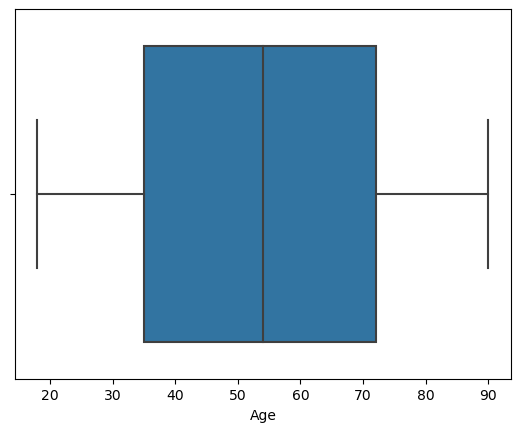

In [6]:
sns.boxplot(x=dataset['Age'])

Dalam *Boxplot* diatas, tidak ditemukan *Outliers* pada kolom numerik *Age*

**Fitur *Cholesterol***

<Axes: xlabel='Cholesterol'>

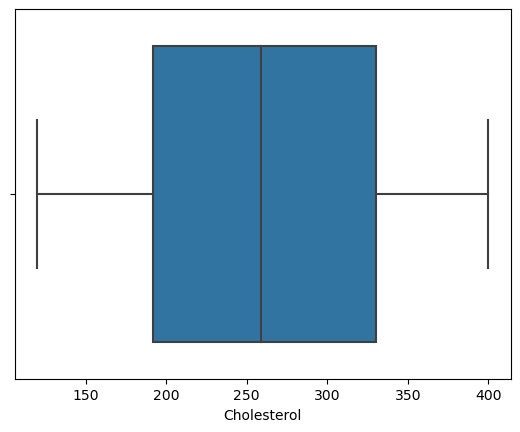

In [7]:
sns.boxplot(x=dataset['Cholesterol'])

Dalam *Boxplot* diatas, tidak ditemukan Outliers pada kolom numerik *Cholesterol*

Identifikasi *Outliers* dapat lebih cepat dilakukan apabila kita memanfaatkan *For Loop* untuk membuat visualisasi boxplot sekaligus kepada seluruh kolom numerikal dalam dataset

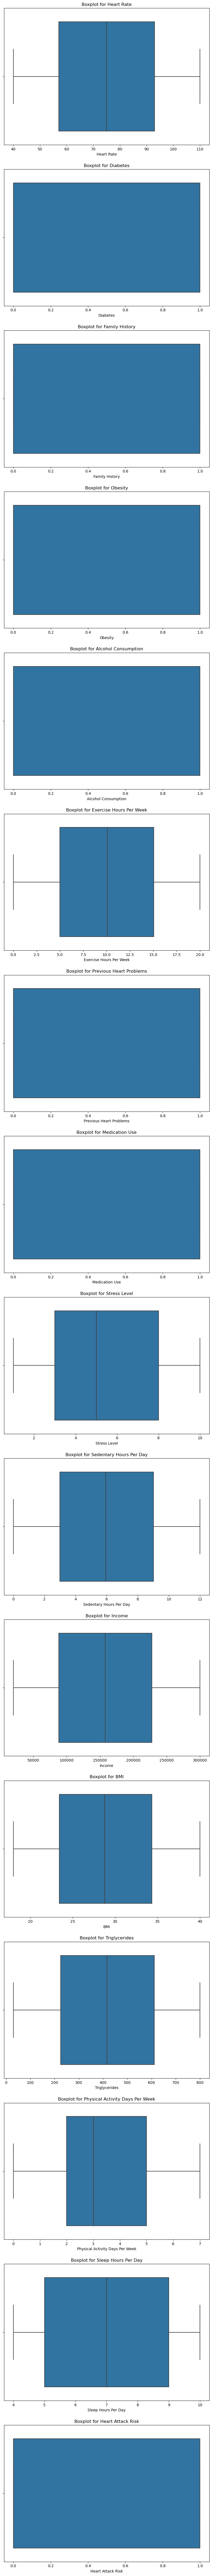

In [8]:
# Pilih kolom numerikal kecuali 'Age' dan 'Cholesterol'
num_cols = dataset.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col not in ['Age', 'Cholesterol', 'Smoking', 'Heart Attack Disease']]

# Buat visualisasi boxplot
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=dataset[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()


Hasil analisa juga menunjukkan jika dataset yang ada tidak memiliki *Outliers* untuk kolom numerikalnya

Tahap berikutnya adalah mengetahui *Shape* dari dataset yang kita gunakan.

In [9]:
dataset.shape

(8763, 26)

Dataset yang kita gunakan memiliki 8763 baris data dengan 26 fitur.

Tahapan selanjutnya yang dilakukan adalah tahapan **Univariate Analysis** dan **Multivariate Analysis**.

### Univariate Analysis
Tahapan ini merupakan tahapan menganalisa satu persatu fitur kategorikal dan numerikal dalam dataset.

### Analisis Fitur Kategorikal

**Fitur Jenis Kelamin (*Sex*)**

Berikut adalah pengecekan distribusi data berdasarkan jenis kelamin.

        jumlah sampel  persentase
Sex                              
Male             6111        69.7
Female           2652        30.3


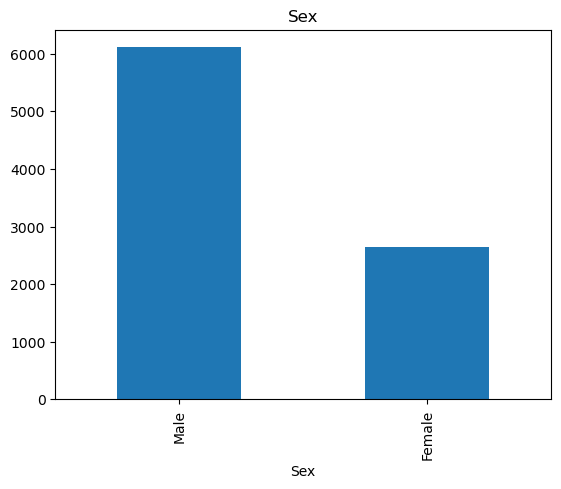

In [10]:
feature = 'Sex'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Distribusi data diatas menunjukkan bahwa lebih banyak data pasien pria ketimbang wanita didalam dataset

**Fitur Diabetes**

Berikut adalah pengecekan distribusi data berdasarkan kategori diabetes

          jumlah sampel  persentase
Diabetes                           
1                  5716        65.2
0                  3047        34.8


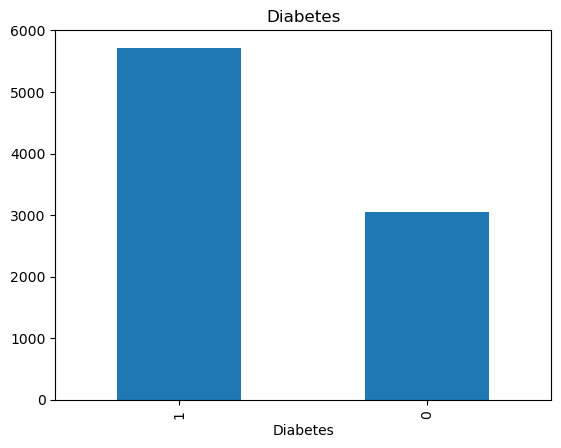

In [11]:
feature = 'Diabetes'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Visualisasi diatas menunjukkan bahwa kebanyakan pasien dalam data mengalami diabetes (65,2%), sedangkan sisanya tidak mengalami diabetes

**Fitur *Family History***

Berikut adalah hasil pengecekan untuk *Family History*

                jumlah sampel  persentase
Family History                           
0                        4443        50.7
1                        4320        49.3


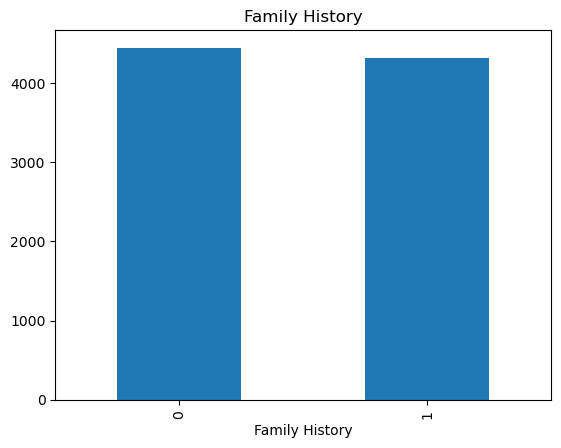

In [12]:
feature = 'Family History'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dalam distribusi diatas terlihat terhadap jumlah yang hampir seimbang antara pasien yang memiliki riwayat keluarga terkena penyakit jantung, dan yang tidak

**Fitur *Smoking***

Berikut adalah kode untuk mengecek sebaran data berdasarkan pasien perokok atau tidak

         jumlah sampel  persentase
Smoking                           
1                 7859        89.7
0                  904        10.3


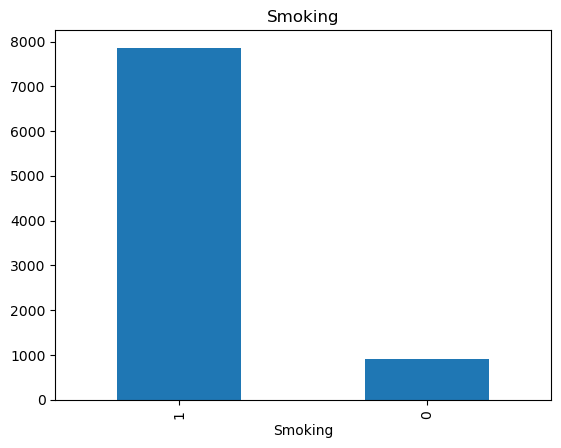

In [13]:
feature = 'Smoking'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dari visualisasi data diatas dapat dilihat, sebagian besar data pasien merupakan perokok (Sekitar 89 Persen) sedangkan sisanya adalah bukan perokok

**Fitur *Obesity***

Berikut adalah pengecekkan sebaran data berdasarkan pasien mengalami Obesitas atau Tidak

         jumlah sampel  persentase
Obesity                           
1                 4394        50.1
0                 4369        49.9


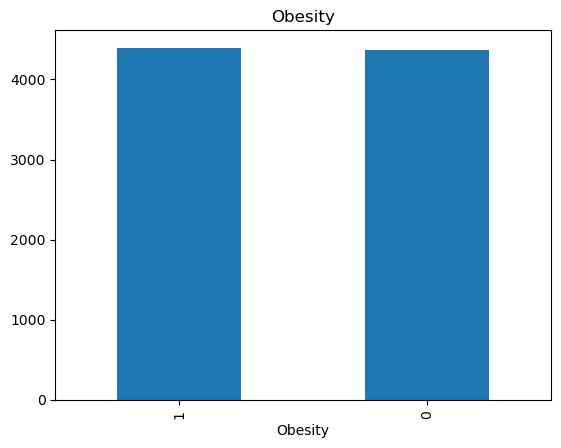

In [14]:
feature = 'Obesity'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dalam distribusi diatas terlihat terhadap jumlah yang hampir seimbang antara pasien mengalami obesitas atau tidak

**Fitur *Alcohol Consumption***

Selanjutnya akan dicek penyebaran data berdasarkan tingkat konsumsi alkohol pasien

                     jumlah sampel  persentase
Alcohol Consumption                           
1                             5241        59.8
0                             3522        40.2


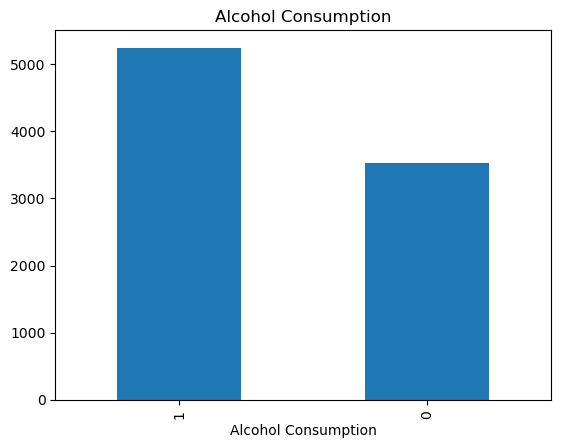

In [15]:
feature = 'Alcohol Consumption'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dalam visualisasi diatas, dapat disimpulkan bahwa terdapat hampir lebih dari setengah data pasien pernah mengkonsumsi alkohol, sedangkan sisanya tidak

**Fitur *Diet***

Berikut adalah analisa untuk melihat sebaran data pasien berdasarkan kebiasaan diet mereka

           jumlah sampel  persentase
Diet                                
Healthy             2960        33.8
Average             2912        33.2
Unhealthy           2891        33.0


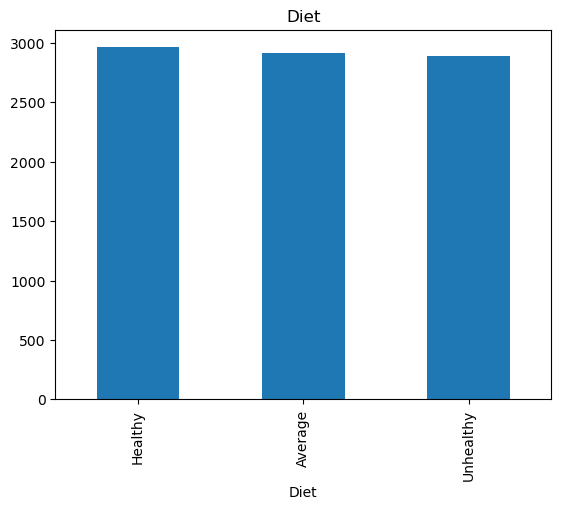

In [16]:
feature = 'Diet'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Terlihat dalam visualisasi data diatas, terdapat distribusi yang cukup seimbang antara pasien dengan kebiasaan diet *Healthy*, Kebiasan Diet *Average*, dan *Unhealthy*

**Fitur *Previous Heart Problems***

Berikut adalah pengecekkan sebaran data berdasarkan riwayat mereka mengalami penyakit jantung sebelumnya

                         jumlah sampel  persentase
Previous Heart Problems                           
0                                 4418        50.4
1                                 4345        49.6


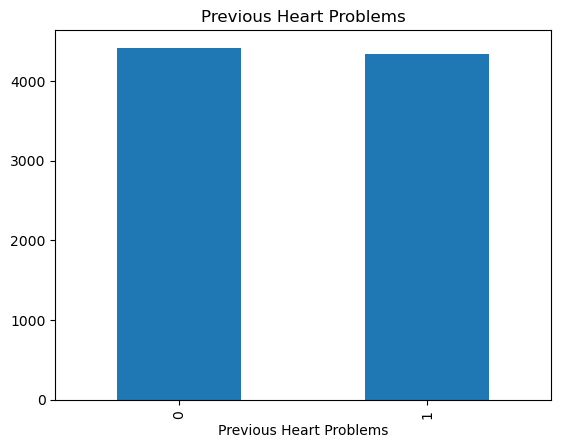

In [17]:
feature = 'Previous Heart Problems'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dalam data diatas, sekitar 49,6 Persen pasien memiliki riwayat penyakit jantung sebelumnya, sedangkan sisanya belum pernah mengalami

**Fitur *Medication Use***

Berikut adalah pengecekan distribusi data berdasarkan pasien sedang dalam penggunaan obat atau tidak

                jumlah sampel  persentase
Medication Use                           
0                        4396        50.2
1                        4367        49.8


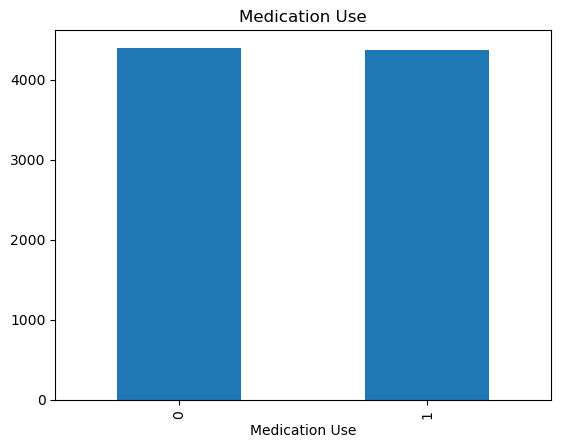

In [18]:
feature = 'Medication Use'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Dalam data diatas, sekitar 49,8 Persen pasien memiliki riwayat penyakit jantung sebelumnya, sedangkan sisanya belum pernah mengalami

**Fitur *Stress Level***

Berikut adalah sebaran data berdasarkan level stress pasien

              jumlah sampel  persentase
Stress Level                           
2                       913        10.4
4                       910        10.4
7                       903        10.3
9                       887        10.1
8                       879        10.0
3                       868         9.9
1                       865         9.9
5                       860         9.8
6                       855         9.8
10                      823         9.4


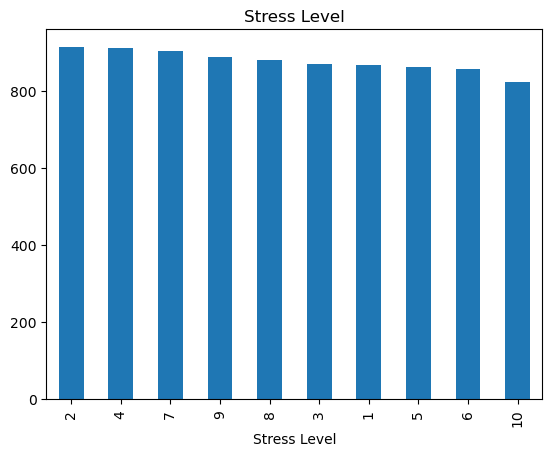

In [19]:
feature = 'Stress Level'
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
count.plot(kind='bar', title=feature)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

Diketahui terdapat distribusi data yang cukup seimbang antara masing masing level stress pasien (Skala 1-100)

## Persiapan Data

### Menghapus Kolom Yang Tidak Digunakan

Beberapa kolom dalam dataset tidak akan digunakan dalam proses membangun Algoritma Prediksi, hal tersebut dikarenakan kolom terkait tidak relevan terhadap proses analisis, Kolom Tersebut adalah Kolom **Patient ID**, **Country**, **Continent**, dan **Hemisphere**

In [20]:
deleted_columns = ["Patient ID", "Country", "Continent", "Hemisphere"]
dataset = dataset.drop(columns=deleted_columns)
dataset.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


Dataset sudah menghapus beberapa kolom yang tidak dibutuhkan, dan siap untuk dilanjutkan ke proses berikutnya

### Memisahkan Data *Blood Pressure*

Jika diperhatikan dalam dataset, fitur *Blood Pressure* Masih dalam bentuk Object yang tentunya belum dapat digunakan dalam predksi machine learning, proses berikutnya adalah memisahkan kolom *Blood Pressure*.  
Nilai dalam *Blood Pressure* sendiri ditulis dalam format *Systolic/Diastolic*
yang mana *Systolic* adalah tekanan darah pada saat jantung memompa darah atau saat berkontraksi, sedangkan *diastolic* adalah tekanan darah pada saat jantung relaksasi

In [21]:
dataset[['BP_Systolic', 'BP_Diastolic']] = dataset['Blood Pressure'].str.split('/', expand=True)

Selanjutnya, mari kita cek data kembali, akan ada penambahan kolom baru yaitu BP_Systolic dan BP_Diastolic

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

Dengan sudah adanya dua kolom baru tersebut, maka kita perlu menghapus kolom *Blood Pressure* sebelumnya karena tidak kita gunakan lagi

In [23]:
dataset = dataset.drop(columns="Blood Pressure")
dataset.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,Male,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


Jika diperhatikan, dua kolom terbaru BP_Systolic dan BP_Diatolic masih memiliki tipe data object, tipe data ini harus dikonversikan ke int64 agar bisa diproses dalam algoritma prediksi

In [24]:
dataset['BP_Systolic'] = dataset['BP_Systolic'].astype('int64')
dataset['BP_Diastolic'] = dataset['BP_Diastolic'].astype('int64')

### Proses Label Encoder

Label Encoder adalah teknik pemrosesan data untuk data kategorikal, Tujuannya adalah untuk mengubah nilai-nilai dalam satu atau lebih pada kolom kategorikal menjadi numerik.

Sebelum memulai, mari identifikasi kembali kolom dari dataset yang masih memiliki tipe data object

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

Terdapat 2 Kolom yang memiliki tipe data object yang akan di *label encoder* sehingga menjadi bentuk numerik, proses tersebut akan dilakukan menggunakan kode dibawah ini

In [26]:
encoder = LabelEncoder()
fitur_kategorikal = ['Sex', 'Diet']
kolom_kategorikal = dataset[fitur_kategorikal]
encoded_kategorikal = kolom_kategorikal.apply(encoder.fit_transform)
dataset[fitur_kategorikal] = encoded_kategorikal

In [27]:
dataset

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int32  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int32  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

Dataset siap diproses ke Langkah Selanjutnya, namun, saatnya mengecek korelasi antar data sehingga kita mengetahui faktor apa saja dalam dataset yang paling berpengaruh pada kondisi seseorang terkena serangan jantung

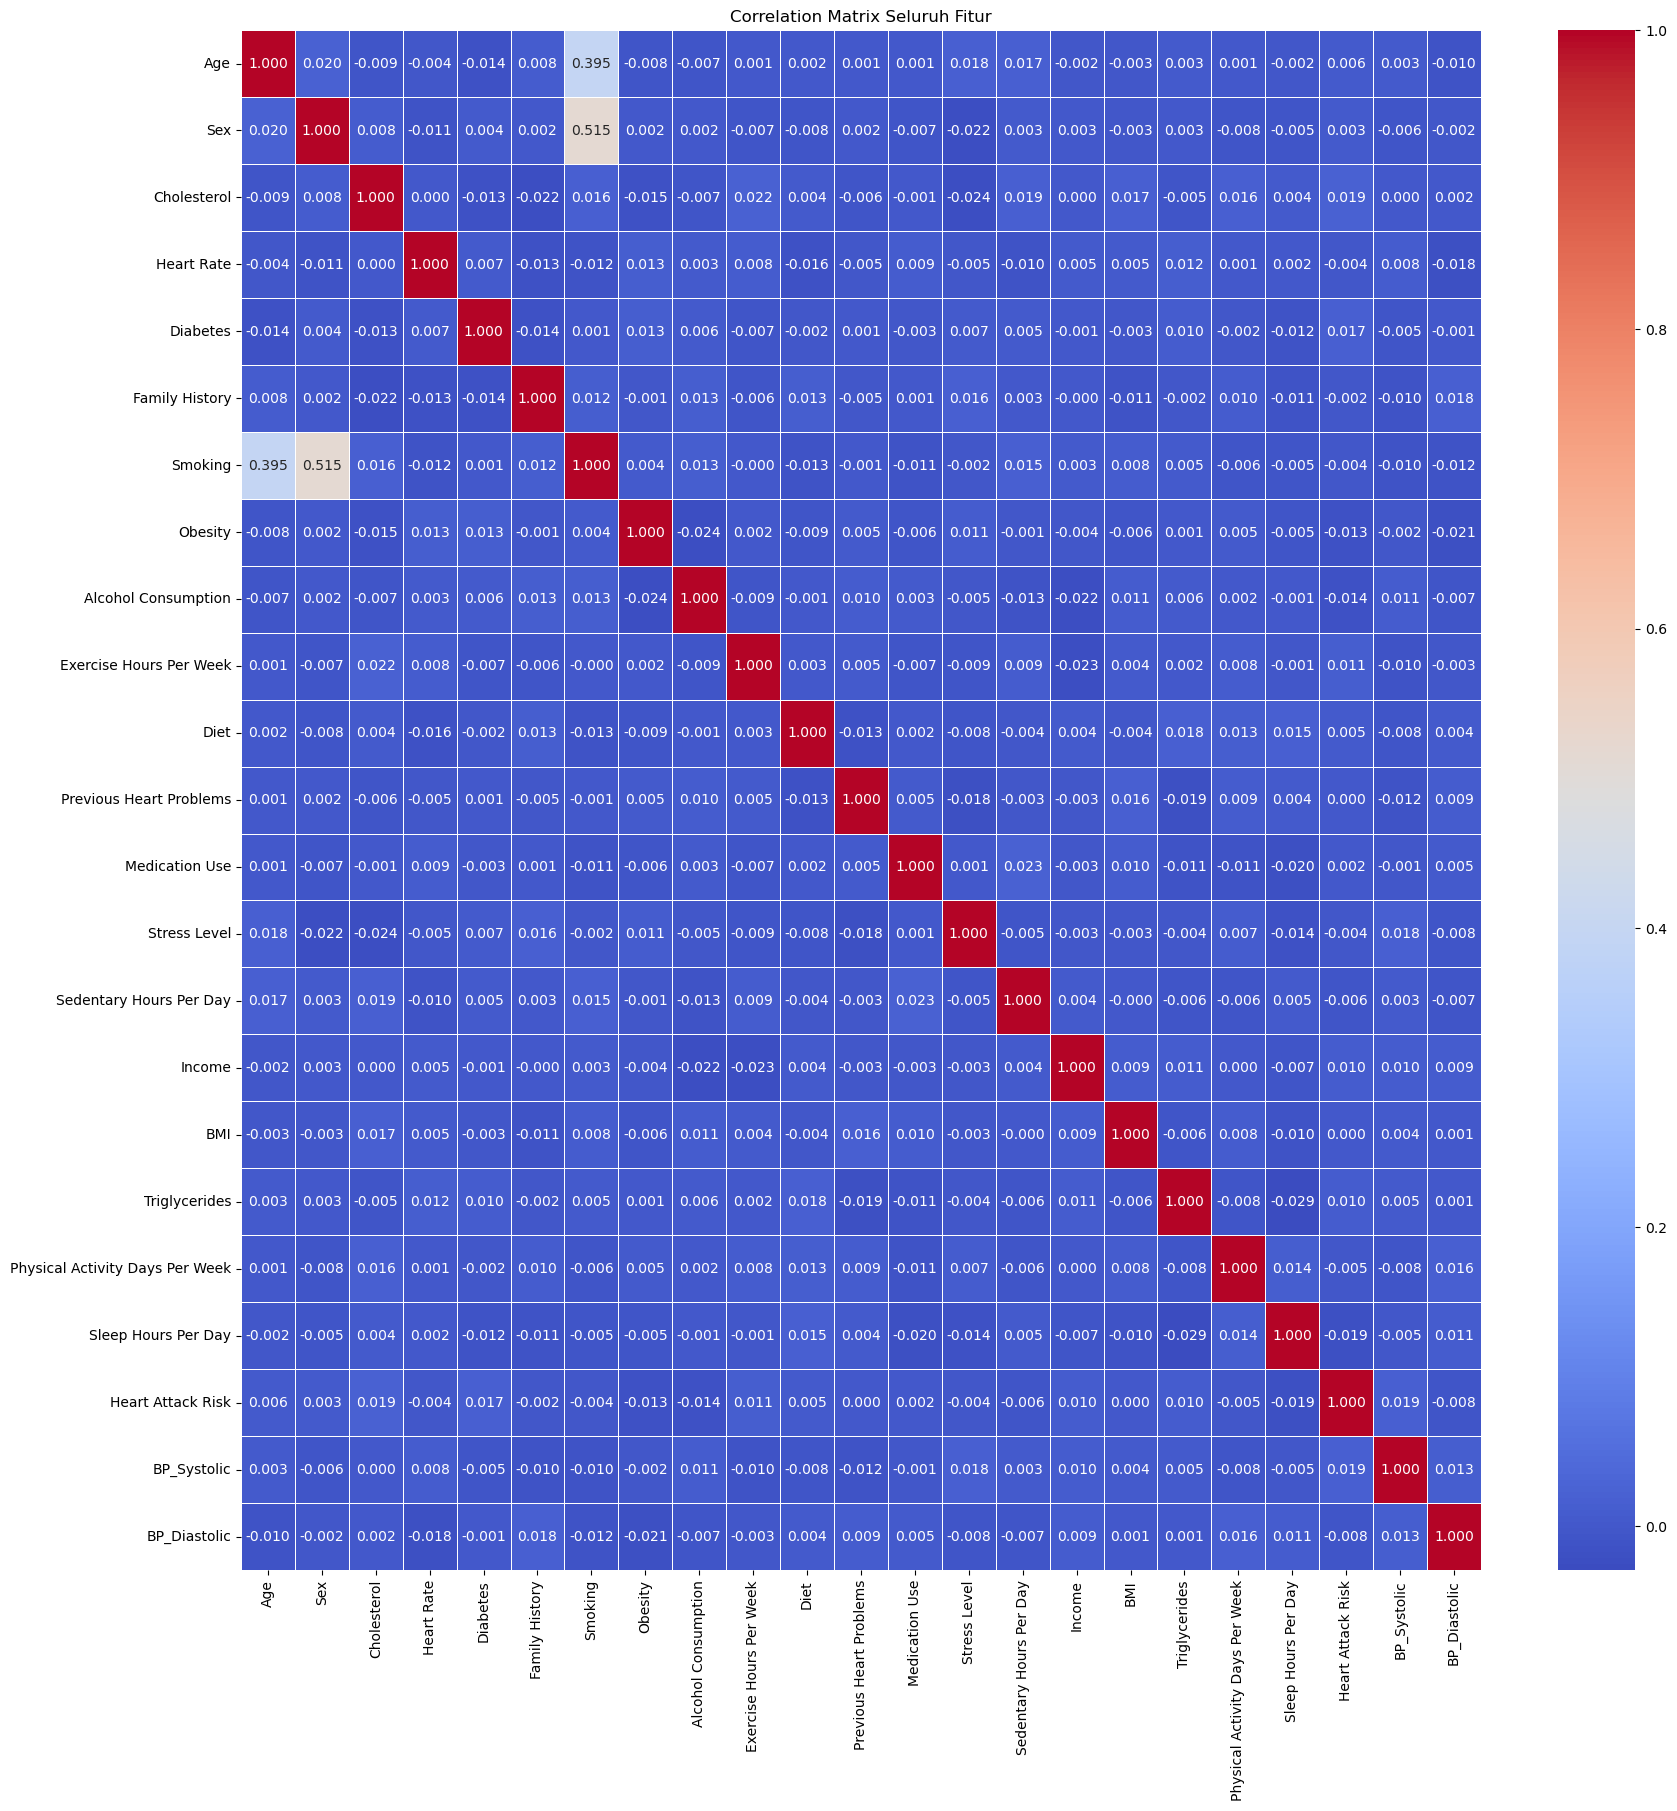

In [29]:
corr = dataset.corr()

#Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix Seluruh Fitur")
plt.show()

Diketahui bahwa fitur yang berkorelasi tinggi dengan target variabel serangat jantung adalah ***Cholesterol***, ***Diabetes***, ***Exercise Hour Per Week***

### *Train Test Split* ###

Proses ini membagi data menjadi data latih dan data uji. Data latih akan digunakan untuk membangun model, sedangkan data uji akan digunakan untuk menguji hasil performa prediksi model.

Langkah pertama dimulai dengan membagi Dataset menjadi fitur X (Fitur Independen) dan fitur Y (Fitur Y atau fitur target).
Lalu proses dilanjutkan dengan membagi data menjadi data latih dan data uji

In [30]:
X = dataset.drop(["Heart Attack Risk"], axis=1)
y = dataset['Heart Attack Risk']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=123)

Berikutnya adalah melihat jumlah Data Latih dan Data Uji

In [31]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 8763
Total of sample in train dataset: 7010
Total of sample in test dataset: 1753


Terdapat 7010 baris data yang akan digunakan di data latih, dan 1753 data digunakan dalam data uji

### Proses Standardisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan.  
Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.
Untuk mengatasi kebocoran data, Standardisasi akan dilakukan di Data latih terlebih dahulu

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.  
Sebelum melakukan standardisasi, gunakan describe(), untuk melihat kolom data yang perlu dilakukan standardisasi

In [32]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Sex,8763.0,0.697364,0.459425,0.000000,0.000000,1.000000,1.000000,1.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709


Kolom *Age*, *Cholesterol*, *Heart Rate*, *Exercise Hours Per Week*, *Stress Level*, *Sedentary Hours Per Day*, *BMI*, *Income*, *Triglycerides*, *Physical Activity Days Per Week*, *Sleep Hours Per Day*, *BP_Systolic*, *BP_Diastolic* memiliki standar deviasi yang cukup tinggi, kolom tersebut akan di standardisasi menggunakan StandardScaler()

In [33]:
kolom_standard = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 
                  'Sedentary Hours Per Day', 'BMI', 'Income', 'Triglycerides', 'Physical Activity Days Per Week', 
                  'Sleep Hours Per Day', 'BP_Systolic', 'BP_Diastolic']
scaler = StandardScaler()
scaler.fit(X_train[kolom_standard])
X_train[kolom_standard] = scaler.transform(X_train.loc[:,kolom_standard])
X_train[kolom_standard].head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,BMI,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,BP_Systolic,BP_Diastolic
390,-1.309646,1.718959,1.113085,0.782979,0.184788,-1.476029,-0.628112,0.452280,0.887862,1.092392,-0.506883,-0.871866,1.624577
938,-0.177616,-0.769473,0.043319,1.529786,0.533192,-0.626977,-1.253034,-0.476642,-0.926712,-1.526509,-1.008754,0.453941,-1.372465
5434,1.048749,-0.546628,-1.707207,-1.242545,0.533192,1.404622,-0.165682,-1.363552,1.116364,0.655908,-1.510625,1.514586,0.670973
2121,0.152559,-0.088559,-0.588815,-1.590278,-0.860423,1.088088,0.150904,1.516067,1.120845,-0.653542,1.500602,-1.326428,0.670973
1897,0.907245,-0.088559,-0.588815,0.161019,-1.208827,1.443466,0.243630,-0.483884,0.135150,-1.090026,-0.506883,1.173664,1.420233


In [34]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7010.0,1.155519e-16,1.000071,-1.686989,-0.885135,0.011055,0.860077,1.709099
Sex,7010.0,6.995720e-01,0.458477,0.000000,0.000000,1.000000,1.000000,1.000000
Cholesterol,7010.0,-5.676233e-17,1.000071,-1.735133,-0.843754,-0.014277,0.864721,1.731339
Heart Rate,7010.0,1.976545e-17,1.000071,-1.707207,-0.880569,-0.005307,0.869956,1.696594
Diabetes,7010.0,6.519258e-01,0.476394,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,7010.0,4.894437e-01,0.499924,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,7010.0,8.982882e-01,0.302291,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,7010.0,4.991441e-01,0.500035,0.000000,0.000000,0.000000,1.000000,1.000000
Alcohol Consumption,7010.0,6.002853e-01,0.489875,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,7010.0,-9.933408e-17,1.000071,-1.714078,-0.875304,-0.004290,0.874816,1.734329


Kolom Numerikal Dalam Data Latih sudah normal dan siap diproses menggunakan algoritma prediksi

## Klasifikasi Menggunakan *Random Forest Classifier*

Algoritma *Random Forest* adalah salah satu algoritma pohon keputusan yang dapat digunakan untuk menyelesaikan masalah klasifikasi, algoritma ini cukup digunakan karena sederhana namun stabil.  
Sebagai salah satu model *Ensemble Learning* (Model yang bekerja bersama-sama), model ini memiliki beberapa kelebihan diantaranya :  
1. Memiliki Kinerja yang baik dalam berbagai jenis masalah klasifikasi
2. Memiliki kemampuan bawaan untuk mengurangi overfitting
3. Mampu menangani dataset yang besar dan fitur yang banyak

Beberapa kelebihan diatas membuat algoritma ini dapat digunakan sebagai salah satu model untuk memprediksi berdasarkan dataset *Heart Attack* yang kita gunakan, mengingat dimensi dataset kita yang juga cukup besar
ada banyak sekali parameter yang kita masukkan dalam Random Forest Classfier, namun dalam proyek ini, kita hanya menggunakan 4 parameter dibawah ini :  
- **n_estimator** : jumlah trees (pohon) di forest. (Nilai Default = 100)
- **max_depth** : kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- **random_state** : digunakan untuk mengontrol random number generator yang digunakan. 
- **n_jobs**: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel

Berikut merupakan implementasi latih data menggunakan *Random Forest Classifier*
Pertama kita akan instansiasi kelas RandomForestClassifier dengan mencoba hyperparameter dibawah ini
- **n_estimators** = 50
- **max_depth** = 12
- **random_state** = 42
- **n_jobs** = -1

In [35]:
Random_Forest = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)

Setelah itu, latih Model yang sudah di instansiasi dengan data latih

In [36]:
Random_Forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=50, n_jobs=-1,
                       random_state=42)

Selanjutnya lakukan prediksi model terhadap data uji, namun sebelumnya, kita akan terapkan standard scaler juga ke Data Uji

In [37]:
X_test[kolom_standard] = scaler.transform(X_test[kolom_standard])

Sebelumnya, mari lihat performa model dalam memprediksi data latih terlebih dahulu

In [38]:
y_train_prediksi = Random_Forest.predict(X_train)
RF_Acc_Train = accuracy_score(y_train,y_train_prediksi)
print(f"Akurasi Model terhadap data latih : {round(RF_Acc_Train * 100,2)}%")

Akurasi Model terhadap data latih : 82.3%


Selanjutnya, prediksi dan evaluasi performa model menggunakan data uji

In [39]:
y_test_prediksi = Random_Forest.predict(X_test)
RF_Acc_Test = accuracy_score(y_test,y_test_prediksi)
print(f"Akurasi Model terhadap data latih : {round(RF_Acc_Test * 100,2)}%")

Akurasi Model terhadap data latih : 64.75%


Akurasi model terhadap data latih cukup baik karena mendapat skor akurasi 82,3% namun, model buruk dalam data uji, langkah berikutnya adalah mencoba penyesuaian Hyperparameter, mari mencoba dengan Hyperparameter dibawah ini
- n_estimators = 50
- max_depth = 18
- random_state = 42
- n_jobs = -1

kita akan mencoba menaikkan jumlah max_depth atau  kedalaman pohon, dan melakukan seluruh proses prediksi lagi

In [40]:
Random_Forest2 = RandomForestClassifier(n_estimators=50, max_depth=18, random_state=42, n_jobs=-1)
Random_Forest2.fit(X_train,y_train)

y_train_prediksi2 = Random_Forest2.predict(X_train)

RF_Acc_Train2 = accuracy_score(y_train,y_train_prediksi2)
print(f"Akurasi Model terhadap data latih : {round(RF_Acc_Train2 * 100,2)}%")

y_test_prediksi2 = Random_Forest2.predict(X_test)
RF_Acc_Test2 = accuracy_score(y_test,y_test_prediksi2)
print(f"Akurasi Model terhadap data uji : {round(RF_Acc_Test2 * 100,2)}%")

Akurasi Model terhadap data latih : 99.79%
Akurasi Model terhadap data uji : 64.23%


Dengan menaikkan jumlah parameter max_depth, akurasi model terhadap data latih meningkat menjadi 99 persen, namun untuk data uji, turun diangka 64 persen, kita akan mencoba langkah terakhir dengan menaikkan n_estimators menggunakan nilai default 100

In [41]:
Random_Forest3 = RandomForestClassifier(n_estimators=100, max_depth=18, random_state=42, n_jobs=-1)
Random_Forest3.fit(X_train,y_train)

y_train_prediksi3 = Random_Forest3.predict(X_train)

RF_Acc_Train3 = accuracy_score(y_train,y_train_prediksi3)
print(f"Akurasi Model terhadap data latih : {round(RF_Acc_Train3 * 100,2)}%")

y_test_prediksi3 = Random_Forest3.predict(X_test)
RF_Acc_Test3 = accuracy_score(y_test,y_test_prediksi3)
print(f"Akurasi Model terhadap data uji : {round(RF_Acc_Test3 * 100,2)}%")


Akurasi Model terhadap data latih : 99.89%
Akurasi Model terhadap data uji : 64.69%


Akurasi masih kurang baik di data uji. perlu dilakukan pengujian berulang kali hingga menemukan hyperparameter yang tepat dalam pengujian menggunakan *Random Forest Classifier*. mungkin menambah beberapa hyperparameter lain yang tersedia dalam dokumentasi resmi random forest classifier

### Analisa Menggunakan *AdaBoost Classifier*

*Ada Boost* merupakan salah satu dari algoritma *Boosting*, yang mana algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi dengan menggabungkan beberapa model sederhana dan dianggap lemah sehingga membentuk model yang kuat.

*Ada Boost Classifier* adalah alat yang memperhatikan contoh yang sulit dikenali oleh klasifier sebelumnya. Itu membuat klasifier baru untuk mencoba memperbaiki kesalahan dan lebih fokus pada contoh yang sulit tersebut.

terdapat beberapa *hyperparameter* yang dapat digunakan dalam *Classifier* ini, namun dalam cakupan proyek terkait, kita hanya menggunakan :
- learning_rate : Menentukan seberapa cepat model belajar dari kesalahan pada setiap iterasi. Jika nilai learning rate kecil, model akan belajar perlahan, sedangkan nilai yang lebih besar akan membuat model belajar lebih cepat.
- n_estimators : Menentukan seberapa cepat model belajar dari kesalahan pada setiap iterasi. Jika nilai learning rate kecil, model akan belajar perlahan, sedangkan nilai yang lebih besar akan membuat model belajar lebih cepat.

Berikut merupakan implementasi menggunakan *Ada Boost Classifier*, kali ini, kita akan menggunakan learning_rate = 0.1 dan random_state = 42 dan n_estimators = 20, dengan melatih model menggunakan data latih

In [42]:
learning_rate = 0.1
Ada_clf1 = AdaBoostClassifier(learning_rate=learning_rate,n_estimators=50, random_state=42)
Ada_clf1.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=42)

Berikut merupakan hasil pengujian model dan akurasi model terhadap data latih dan data uji

In [43]:
ada_pred_train = Ada_clf1.predict(X_train)
Ada_acc_train = accuracy_score(y_train,ada_pred_train)
print(f"Akurasi Model terhadap data latih : {round(Ada_acc_train * 100,2)}%")

ada_pred_test = Ada_clf1.predict(X_test)
Ada_acc_test = accuracy_score(y_test,ada_pred_test)
print(f"Akurasi Model terhadap data latih : {round(Ada_acc_test * 100,2)}%")

Akurasi Model terhadap data latih : 63.95%
Akurasi Model terhadap data latih : 65.09%


Diketahui bahwa hasil menggunakan Ada boost classifier juga memiliki tingkat akurasi di angka 65%

### Kesimpulan

berikut merupakan hasil performa pengujian model prediksi, yang mana pengujian dilakukan menggunakan *Random Forest Classifier* dengan 3 kali pengujian dan *Hyperparameter Tuning*, dan dengan 1x pengujian menggunakan *Ada Boost Classifier*

In [44]:
models = pd.DataFrame({
    'Model':
    ['Random_Forest 1', 'Random_Forest 2', 'Random_Forest 3', 'Ada Boost Classifier'],
    'Accuracy Test' :
    [RF_Acc_Test, RF_Acc_Test2, RF_Acc_Test3, Ada_acc_test],
    'Accuracy Train' :
    [RF_Acc_Train, RF_Acc_Train2, RF_Acc_Train3, Ada_acc_train]
})
models

,Model,Accuracy Test,Accuracy Train
0,Random_Forest 1,0.647461,0.822967
1,Random_Forest 2,0.642327,0.997860
2,Random_Forest 3,0.646891,0.998859
3,Ada Boost Classifier,0.650884,0.639515


Hasil Penelitian diatas mendapatkan kesimpulan :
1. Meskipun *Random Forest* diketahui dapat mengurangi *overfitting*, dalam 3 kali pengujian dengan mengubah beberapa *Hyperparameter*, model memrediksi sangat baik dalam data latih, namun tidak dengan data uji, dengan rata-rata hasil prediksi sebesar 64%
2. Pengujian menggunakan *Ada Boost Classifier* membuktikan tidak ada *overfitting* dalam data, namun, prediksi hasil data uji masih cukup rendah yaitu diangka 65%

berdasarkan pengujian menggunakan 2 algoritma diatas, dapat disimpulkan bahwa algoritma belum bisa bekerja lebih baik dengan data yang anda, walaupun data sudah dianalisis dengan memastikan tidak ada *missing values*, *duplicate*, ataupun *outlier*, dan data juga sudah di *normalisasi*.  

Metode lain mungkin dapat dilakukan, seperti penerapan menggunakan *Artificial Neural Network* atau metode lainnya yang mungkin dapat menangani dataset lebih baik.
Agar mencapai akurasi yang lebih baik daripada sebelumnya, mengingat masalah kesehatan tentunya  membutuhkan tingkat akurasi yang lebih baik dari yang sudah dihasilkan algorima ini